## This dataset contains house sale prices for King County including homes sold between           
## May 2014 and May 2015. 

## The goal is to predict the sales price for each house based on the given features.  

### Importing the necessary libraries and dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\INISH\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## functions which are used repeatatively

In [2]:
#Function to plot histogram of price
def DrawHistogram(variable_name):
    n, bins, patches = plt.hist(x=variable_name, bins=100, color='green', alpha=0.5)
    plt.ylabel('Frequency')
    maxfreq = n.max()

In [4]:
"""
**Mean squared error (MSE)** is a measure of how close
the predictions of a model are to the actual values. 
It is calculated by taking the average of the squared
differences between the predictions and the actual values.

**Root mean squared error (RMSE)** is a variation of MSE 
that takes the square root of the MSE. This makes it easier
to interpret the RMSE, as it is in the same units as the original data.

**R-squared** is a measure of how well a model explains
the variation in the data. It is calculated by taking the 
proportion of the variance in the data that is explained by the model.

**Significance of each statistic:**

* MSE: A lower MSE value indicates that the model is making
more accurate predictions.
* RMSE: A lower RMSE value indicates that the model is making 
more accurate predictions.
* R-squared: A higher R-squared value indicates that the model
is explaining more of the variation in the data.

**Difference between MSE and RMSE:**

MSE is calculated by taking the average of the squared differences
between the predictions and the actual values. RMSE is calculated 
by taking the square root of the MSE. This makes the RMSE more
interpretable, as it is in the same units as the original data.

**Difference between MSE and R-squared:**

MSE is a measure of how close the predictions of a model are to 
the actual values. R-squared is a measure of how well a model 
explains the variation in the data.

**Significance of the regression plot:**

The regression plot shows the relationship between the predicted 
values and the actual values. It can be used to assess the fit of
the model to the data. A good fit is indicated by a linear trend 
in the plot, with the points clustered close to the line.

**Overall, the statistics and regression plot can be used to assess 
the performance of the model and to determine how well it is able to
explain the variation in the data.**
"""


def printStatistics(df1,df2):
    mse=mean_squared_error(df1,(df2))
    print("Mean squared error:"+ str(mse))
    rmse = np.sqrt(mean_squared_error(df1,(df2)))
    print("Root mean squared logarithmic error: "+ str(rmse))
    r_squared = r2_score(df1,df2)
    
    #But how much better does the green line fit the data compared to 
    #the mean line?

    print("R-squared value: "+ str(r_squared))
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df2,y=df1)   

## Data Cleaning

In [6]:
#### for suppressing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_data = pd.read_csv('kc_house_data.csv')

In [7]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [8]:
train_data.shape

(21613, 21)

In [9]:
train_data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

### The dataset has 21000 rows but the number of unique ids are 21436 so, checking for duplicates

In [10]:
train_data.duplicated().sum()

0

In [11]:
IDCount = train_data.groupby('id')['yr_built','zipcode'].count()
IDCount[0:10]

,yr_built,zipcode
id,,
1000102,2,2
1200019,1,1
1200021,1,1
2800031,1,1
3600057,1,1
3600072,1,1
3800008,1,1
5200087,1,1
6200017,1,1


In [12]:
train_data.loc[train_data['id'] == 1000102]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2496,1000102,20140916T000000,280000.000,6,3.000,2400,9373,2.000,0,0,...,7,2400,0,1991,0,98002,47.326,-122.214,2060,7316
2497,1000102,20150422T000000,300000.000,6,3.000,2400,9373,2.000,0,0,...,7,2400,0,1991,0,98002,47.326,-122.214,2060,7316


In [13]:
train_data.loc[train_data['id'] == 7200179]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16814,7200179,20141016T000000,150000.000,2,1.000,840,12750,1.000,0,0,...,6,840,0,1925,0,98055,47.484,-122.211,1480,6969
16815,7200179,20150424T000000,175000.000,2,1.000,840,12750,1.000,0,0,...,6,840,0,1925,0,98055,47.484,-122.211,1480,6969


#### Hence, it is clear that the few number of homes are sold multiple time
In next step I will check if there are any missing values in dataset

In [14]:
train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
train_data = train_data.dropna()

In [17]:
train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Now the dataset is pretty clean
In next step I will look into datatypes of columns

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Data analysis and Data visualization

In [19]:
train_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


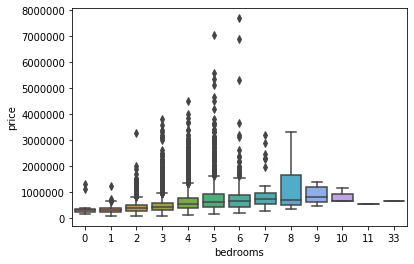

In [20]:
"""
In the presence of outliers, the whiskers 
of the box plot may be trimmed to 1.5 times 
the interquartile range (IQR) beyond the Q1 and Q3 quartiles. 
This means that any values that fall outside of this range are
considered to be outliers and are not included in the calculation
of the maximum and minimum values.
"""


sns.boxplot(x= train_data['bedrooms'], y=train_data['price'])

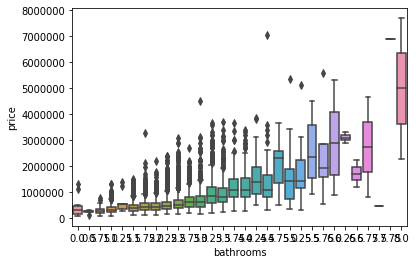

In [21]:
sns.boxplot(x= train_data['bathrooms'], y=train_data['price'])

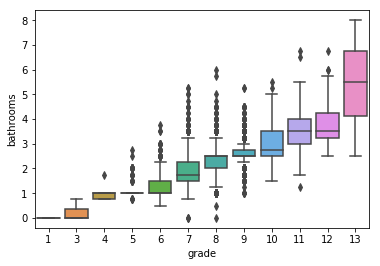

In [20]:
sns.boxplot(x= train_data['grade'], y=train_data['bathrooms'])

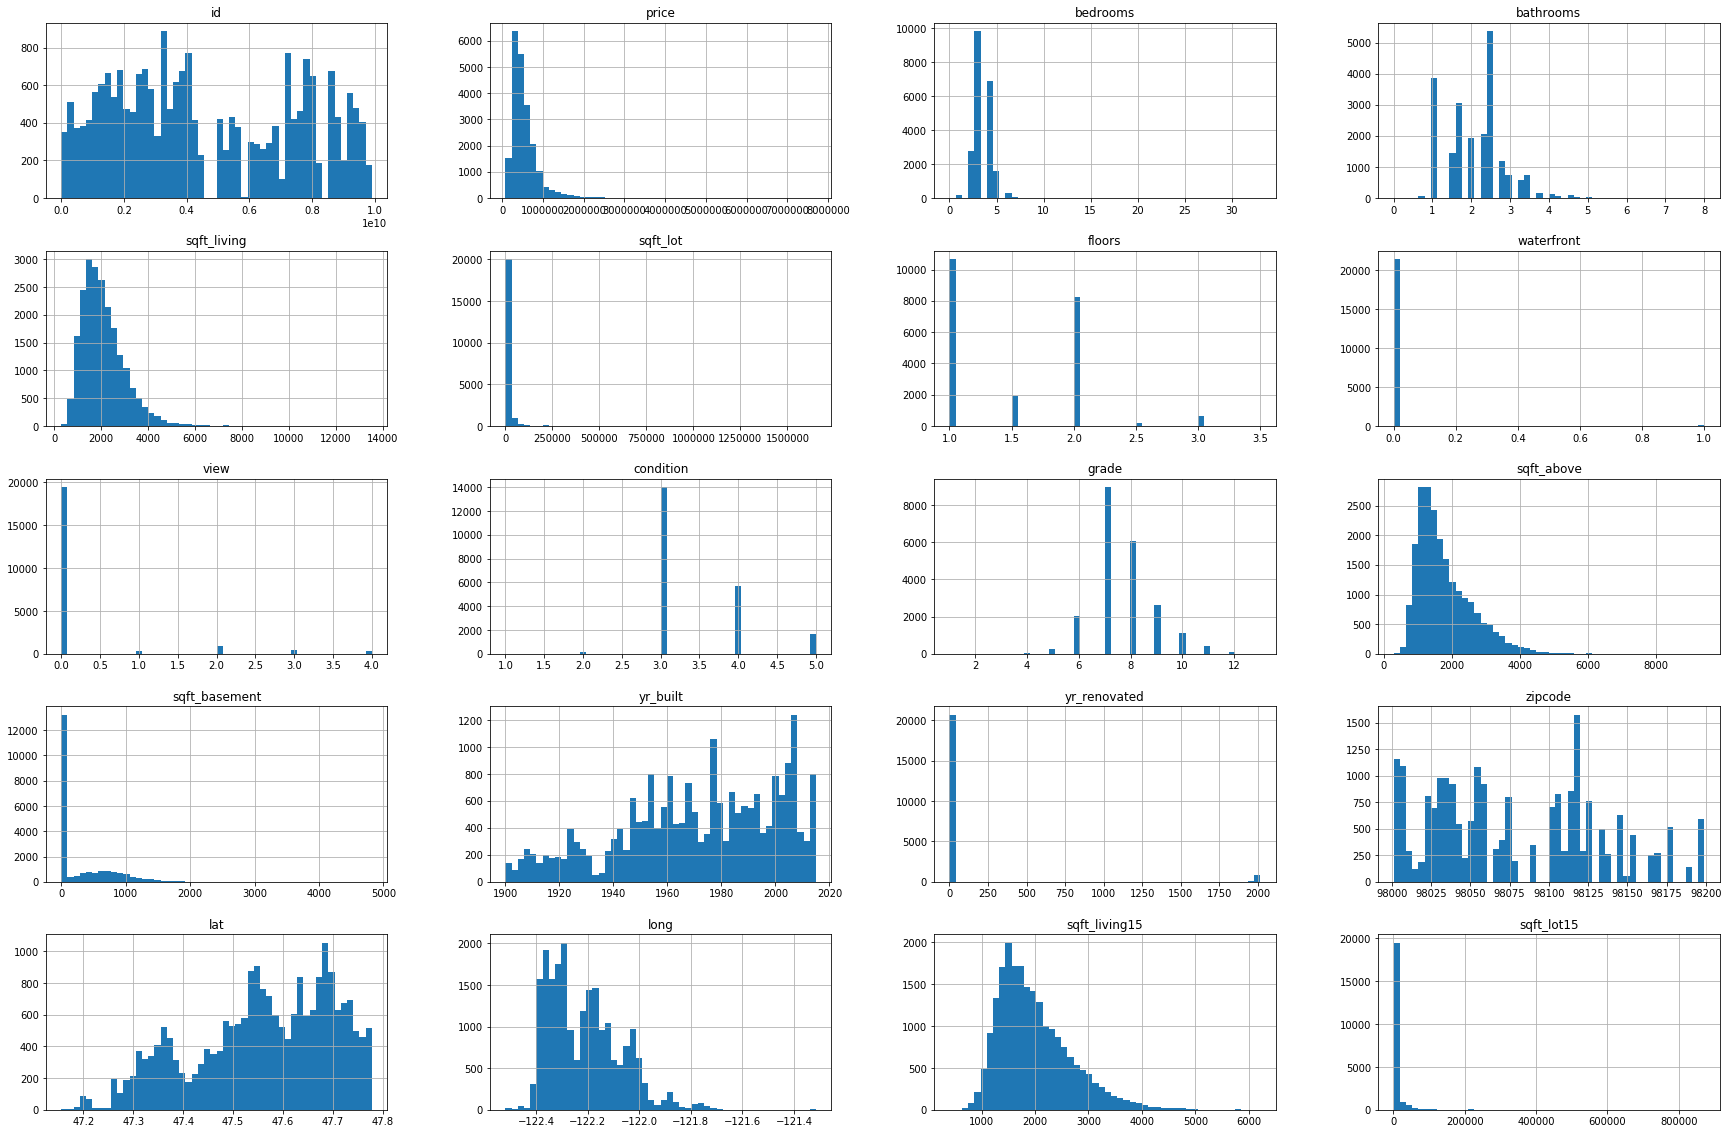

In [23]:
# Plot the histograms of each 
train_data.hist(bins=50, figsize=(30,20))
plt.show()

## Conclusions from above histrograms
1] Most of the houses in the dataset have 3 bedrooms
2] Most of the houses have condition 3 and have only 1 floor
3] Most of the houses have grade=7
4] The histograms of Price and sqft_living are right-skewed.

## From above statistics we can analyse the dataset
1.  Average price of house sold in King County is $538926.
2.  We can observe that there are very few houses which have some features and price appear far from others like 33                bedrooms or price $7700000
3.  There will always be some outliers as some luxury house prices in this dataset I did normalisation in next step to reduce       the effect of outliers
4.  The sqft_living column has maximum value of 12050 sqft, which is 3 standard deviations above mean. This can be the             case if house is luxury but  to reduce the effect I did normalisation of this column as well
5.  Avg no. of 3 bedrooms and 2 bathrooms per house were sold in King County 
6.  Avg area of house is 2071 Sqft with one house having 12050 Sqft. area
7. The dataset contains houses built from year 1900 to 2015

## Data preprocessing
The price and sqft_living has appreciable positive skewness, deviates from the normal distribution. Log transormation to make the scale numeric

Text(0.5, 0, 'price')

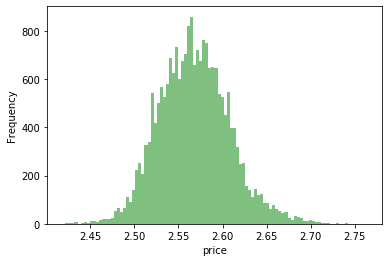

In [26]:
"""
right skewed data is log-normal distributed data
its log transformation is always normal distributed
"""

train_data.price = np.log(train_data.price)
DrawHistogram(train_data.price)
plt.xlabel('price')

In [27]:
train_data.price.describe()

count   21613.000
mean        2.568
std         0.040
min         2.418
25%         2.540
50%         2.566
75%         2.594
max         2.764
Name: price, dtype: float64

## Computing new columns

#### Calculating the age of house by taking the difference between year_sold and year_built

In [28]:
train_data['year_sold'] = train_data['date'].apply(lambda x: int(x[:4]))

In [29]:
train_data['house_age'] = train_data[['year_sold']].sub(train_data['yr_built'], axis=0)

#### The yr_renovated has no significance because we can not tell wheter it is renovated or not so I will create a column which will have value 0 for no renovation and 1 for renovated house.

In [30]:
train_data['is_renovated'] = train_data['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

### Remove the columns date,yr_built as we have used them to calculate new column

In [31]:
train_data.drop(["yr_built", "yr_renovated","date","year_sold"], axis = 1, inplace = True) 

## Feature Selection
 Unnecessary features decrease training speed, 
 decrease model interpretability, 
 and, most importantly, decrease generalization performance on the test set.

In [28]:
train_data.shape

(15999, 20)

###### Now there are 20 columns in our dataset so we have to select those important features only which have high impact on price. Correlation refers to some statistical relationships involving dependence between variables.
A heatmap shows the relative intensity of a value within an array. This means that we have a large amount of numbers, and each is given a graphical representation. Those that are highest in their value – relative to the other present numbers – will be given a “hot” color, while those that are lower in their value

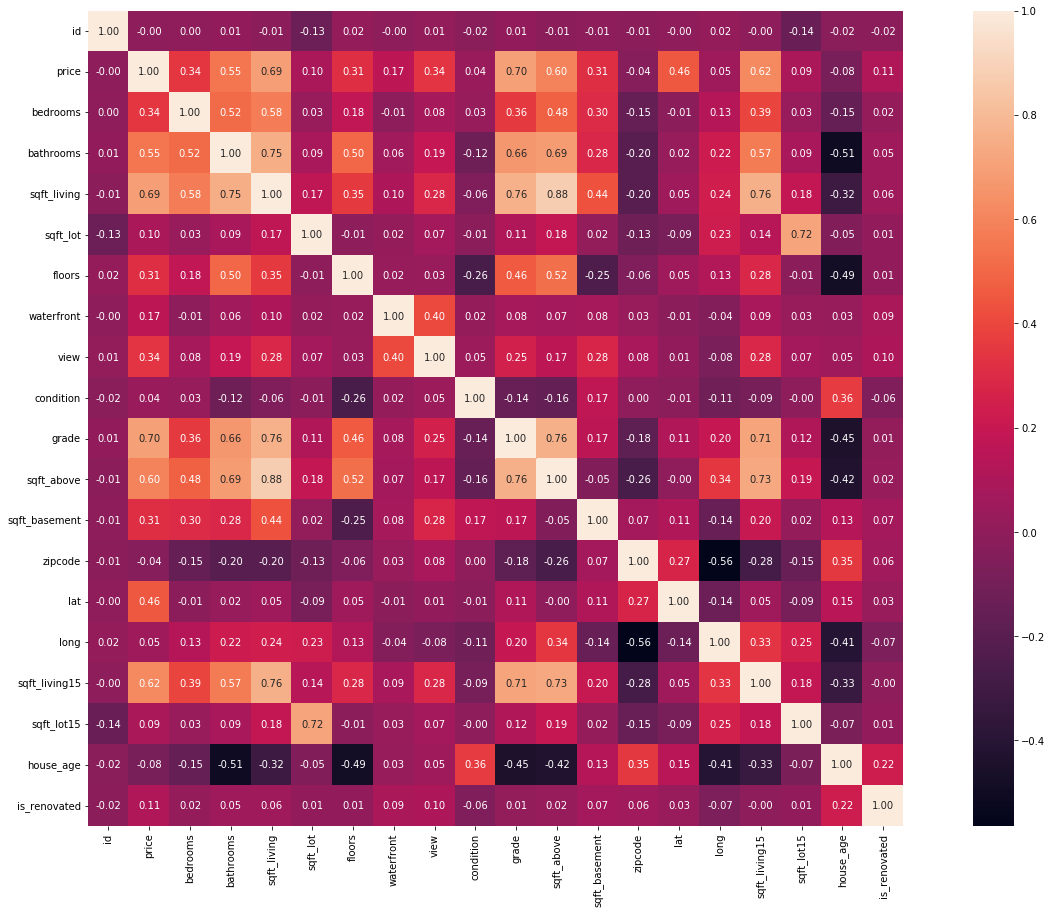

In [33]:
#price correlation matrix
corrmat =train_data.corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

### printing correlation values of each coefficient with respect to price

In [36]:
corr_matrix = train_data.corr()
cor_target=abs(corr_matrix["price"]).sort_values(ascending=False)
cor_target

price           1.000
grade           0.700
sqft_living     0.689
sqft_living15   0.616
sqft_above      0.596
                 ... 
zipcode_98024   0.007
zipcode_98011   0.006
zipcode_98059   0.005
zipcode_98070   0.003
id              0.003
Name: price, Length: 89, dtype: float64

### Converting zipcodes into categories

In [ ]:
#train_data = pd.get_dummies(train_data,columns=['zipcode'])

### As we can see the correlation value for grade, sqft_living,sqft_living15, sqft_above ,bathrooms, lat ,view,          bedrooms, floors are above 0.3 and other features have much less coefficients. So now I will try to visualize whether the correlation values above reflects the same.

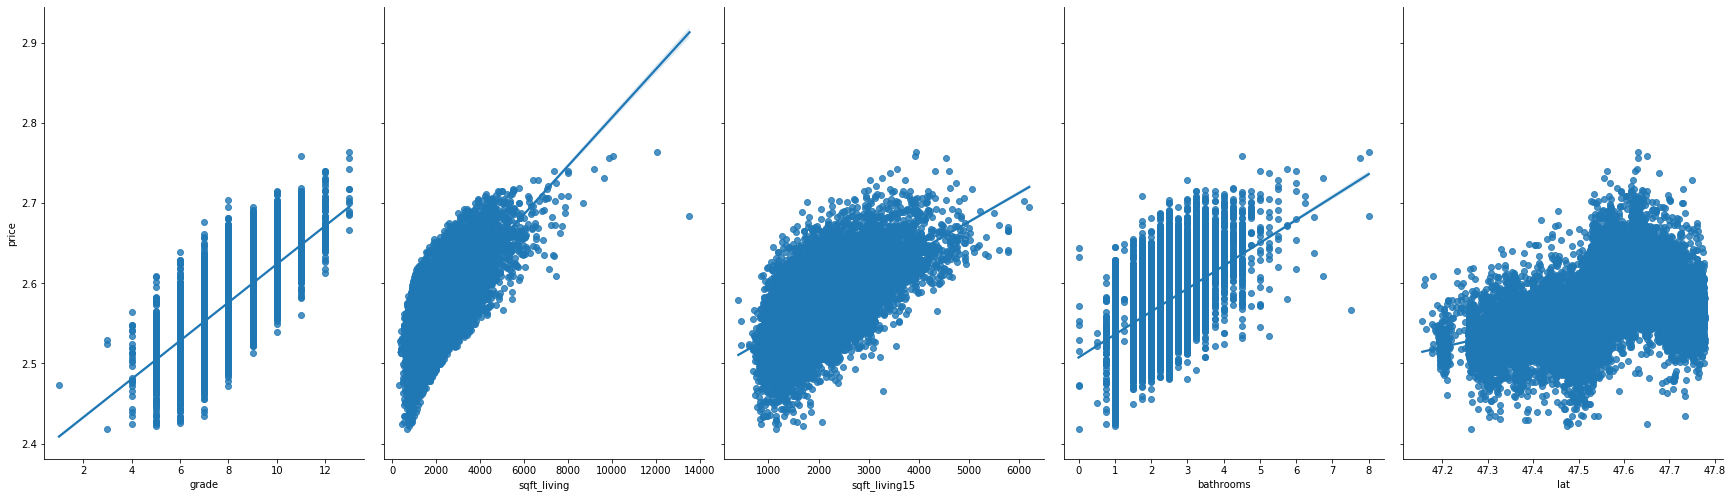

In [38]:
sns.pairplot(train_data, x_vars=['grade','sqft_living','sqft_living15','bathrooms','lat'], y_vars='price', size=7, aspect=0.7, kind='reg')


### The visualisation makes it clear that with sqft_living, grade, bathrooms,lat features price of houses increases significantly

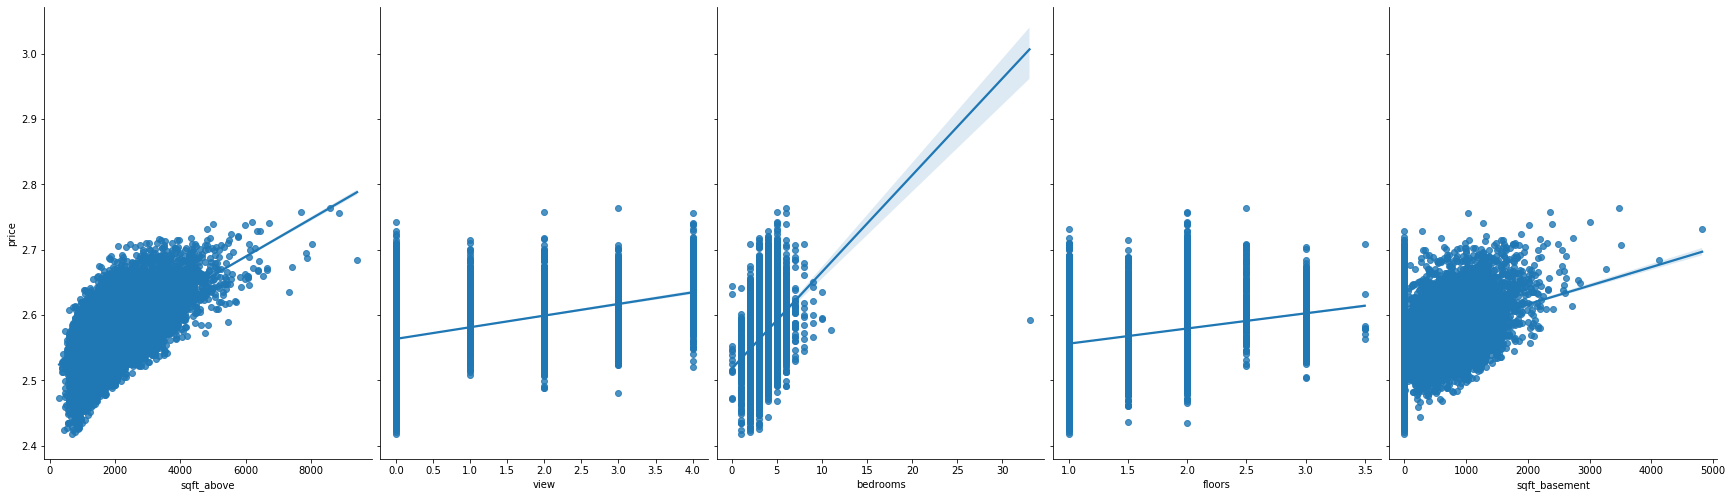

In [39]:
sns.pairplot(train_data, x_vars=['sqft_above','view','bedrooms','floors','sqft_basement'], y_vars='price', size=7, aspect=0.7, kind='reg')


### The visualisation makes it clear with sqft_above, view, bedrooms,floors,sqft_basement features price of houses shows slight increase but not as significant as above features

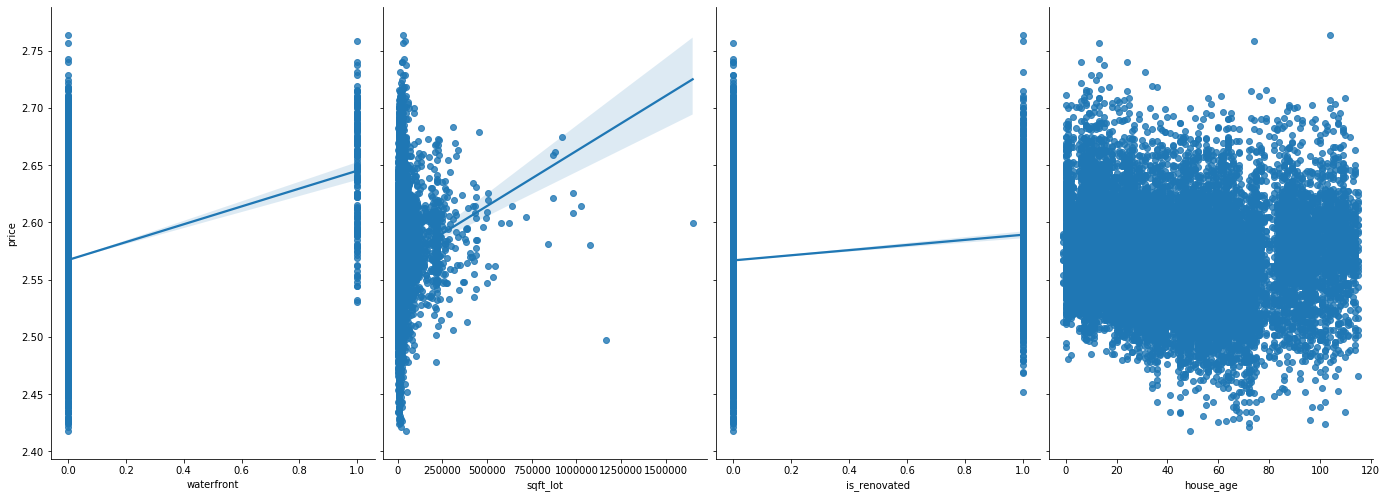

In [40]:
sns.pairplot(train_data, x_vars=['waterfront','sqft_lot','is_renovated','house_age'], y_vars='price', size=7, aspect=0.7, kind='reg')

### Surprisingly, age of house or whether it is renovated or not does not affect the price of house much. 
#### Now I will keep only those features whose value is greater than 0.5. 
#### One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.
#### So, I will exclude sqft_living15 because it is highly correlated with sqft_living(0.76). 

In [41]:
#Selecting highly correlated features
relevant_features1 = cor_target[cor_target>0.5]
relevant_features1

price           1.000
grade           0.700
sqft_living     0.689
sqft_living15   0.616
sqft_above      0.596
bathrooms       0.549
Name: price, dtype: float64

In [42]:
main_features1 = ['grade','sqft_living','sqft_above','bathrooms']
X1 = train_data[main_features1]
y1 = train_data.price

In [43]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=0)

## Model Implementation

### 1] Simple linear regression

In [44]:
#Initialize Linear Regression variable
LinearRegression1 = linear_model.LinearRegression()
LinearRegression1.fit(X_train1,y_train1)

LinearRegression()

Mean squared error:0.0006852010675306386
Root mean squared logarithmic error: 0.026176345572494236
R-squared value: 0.5591026535904996


'Accuracy: 56%'

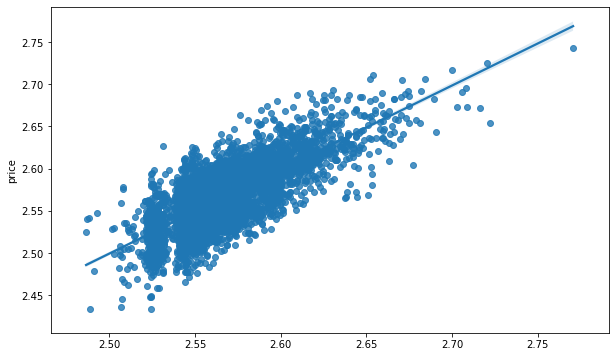

In [45]:
predictions1 = LinearRegression1.predict(X_test1)
printStatistics(y_test1,predictions1)
accuracy = LinearRegression1.score(X_test1, y_test1)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [46]:
scores = cross_val_score( LinearRegression1, X1, y1, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.5551223051514261


### The previous model has R squared very low it is because I have used less features to predict the price. 
### Now I will include more features to increase the R squared value by  selecting features which have 
### correlation coefficient>0.2

In [47]:
#Selecting highly correlated features
relevant_features2 = cor_target[cor_target>0.2]
relevant_features2

price           1.000
grade           0.700
sqft_living     0.689
sqft_living15   0.616
sqft_above      0.596
bathrooms       0.549
lat             0.456
bedrooms        0.343
view            0.340
sqft_basement   0.314
floors          0.312
zipcode_98004   0.217
Name: price, dtype: float64

In [48]:
main_features2 = ['grade','sqft_living','sqft_living15','sqft_above','bathrooms','view','lat','bedrooms',
                  'sqft_basement','waterfront','zipcode_98004','floors']
X2 = train_data[main_features2]
y2 = train_data.price

In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=0)

#### I will check the best possible features to train the model by using recursive feature elimination.
#### It uses accuracy metric to rank the feature according to their importance. 
#### The RFE method takes the model to be used and the number of required features as input.

### Recursive feature elimination

In [57]:
"""
This code is a good example of how to use the 
RFE class to select the optimal number of features
for a linear regression model. It is important to note 
that this is just one approach to feature selection, and 
there are other approaches that may be more suitable for 
specific problems.
"""


#no of features
            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(1,12):
    model = LinearRegression()
    rfe = RFE(model)
    rfe.n_features_to_select = n
    
    """
    This line transforms the training data using the
    RFE object. The fit_transform() method will recursively 
    remove features from the training data until the desired
    number of features is reached. At each step, the feature 
    that is least important to the model is removed.
    """
    X_train_rfe = rfe.fit_transform(X_train2,y_train2)
    X_test_rfe = rfe.transform(X_test2)
    model.fit(X_train_rfe,y_train2)
    
    score = model.score(X_test_rfe,y_test2)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = n
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.743722


In [58]:
cols = list(X_train2.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model)
rfe.n_features_to_select = 11
#Transforming data using RFE
X_rfe = rfe.fit_transform(X2,y2)  
#Fitting the data to model
model.fit(X_rfe,y2) 

"""
This line creates a Pandas Series object from the 
rfe.support_ attribute. The rfe.support_ attribute
is a Boolean array that indicates which features were 
selected by the RFE object.
"""
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['grade', 'sqft_living', 'sqft_living15', 'bathrooms', 'view', 'lat',
       'bedrooms', 'sqft_basement', 'waterfront', 'zipcode_98004', 'floors'],
      dtype='object')


In [61]:
main_features3 = ['grade', 'sqft_living', 'sqft_above', 'bathrooms', 'view', 'lat',
       'bedrooms', 'sqft_basement', 'waterfront', 'zipcode_98004', 'floors']
X3 = train_data[main_features3]
y3 = train_data.price

In [62]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=0)

###  2] Complex Linear Regression(with more features)

In [63]:
#Initialize Linear Regression variable
LinearRegression2 = linear_model.LinearRegression()
LinearRegression2.fit(X_train3,y_train3)


LinearRegression()

Mean squared error:0.00040225983392632825
Root mean squared logarithmic error: 0.020056416278246926
R-squared value: 0.7411631391871496


'Accuracy: 74%'

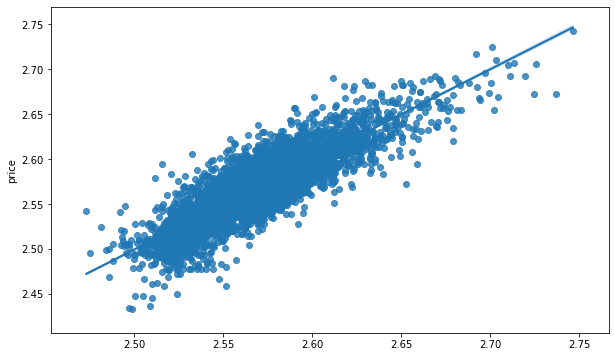

In [64]:
predictions2 = LinearRegression2.predict(X_test3)
printStatistics(y_test3,predictions2)
accuracy = LinearRegression2.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

## Cross Validation
Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

In [65]:
scores = cross_val_score( LinearRegression2, X3, y3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.737341571208013


## 3] Ridge regression

Mean squared error:0.0004025030005270252
Root mean squared logarithmic error: 0.020062477427452104
R-squared value: 0.7410066719630557


'Accuracy: 74%'

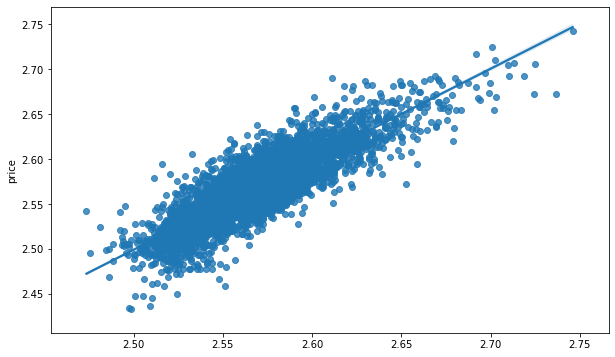

In [66]:
ridgeReg = Ridge(alpha=0.01, normalize=True)
ridgeReg.fit(X_train3,y_train3)
predictions3 = ridgeReg.predict(X_test3)
printStatistics(y_test3,predictions3)
accuracy = ridgeReg.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [67]:
scores = cross_val_score( ridgeReg, X3, y3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.7373031165511982


## 4] polynomial regression

Mean squared error:0.00035914626511458715
Root mean squared logarithmic error: 0.018951154717182464
R-squared value: 0.7689048619953822


'Accuracy: 77%'

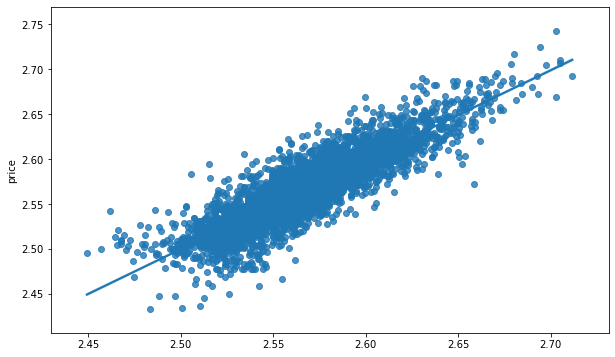

In [68]:
from sklearn.preprocessing import PolynomialFeatures
# Quadratic
poly = PolynomialFeatures(degree=2)
X_train4 = poly.fit_transform(X_train3)
X_test4 = poly.fit_transform(X_test3)

QuadraticPolynomial = LinearRegression2.fit(X_train4, y_train3)
predictions4 = QuadraticPolynomial.predict(X_test4)
printStatistics(y_test3,predictions4)

accuracy = QuadraticPolynomial.score(X_test4, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [69]:
predictions4

array([2.5618793 , 2.65350404, 2.56017581, ..., 2.55774088, 2.52788977,
       2.56421347])

In [70]:
scores = cross_val_score(QuadraticPolynomial, X_train4, y_train3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.7670083367287331


### 5]  Lasso Regression

Mean squared error:0.0008259814185707207
Root mean squared logarithmic error: 0.0287398924592755
R-squared value: 0.46851656705117195


'Accuracy: 47%'

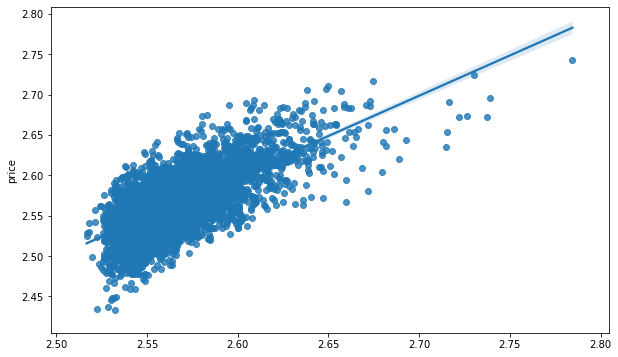

In [71]:
lasso = Lasso(alpha=0.01)
lassoModel=lasso.fit(X_train3,y_train3)
predictions_lasso = lassoModel.predict(X_test3)
printStatistics(y_test3,predictions_lasso)
accuracy = lassoModel.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

### Models with all features

In [72]:
X_whole_features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'house_age', 'is_renovated', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

In [73]:
X_whole = train_data[X_whole_features]
y_whole = train_data.price

In [ ]:
import statsmodels.api as sm
#Backward Elimination
cols = list(X_whole.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_whole[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_whole,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

In [60]:
X_whole_features1=['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
                   'sqft_basement', 'lat', 'long', 'sqft_living15', 'house_age', 'is_renovated', 'zipcode_98001', 
                   'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 
                   'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 
                   'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 
                   'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98040',
                   'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
                   'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 
                   'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 
                   'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 
                   'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
                   'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 
                   'zipcode_98155','zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 
                   'zipcode_98198', 'zipcode_98199']

In [61]:
X_whole = train_data[X_whole_features1]
y_whole = train_data.price

In [62]:
X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(X_whole, y_whole, test_size=0.20, random_state=0)

### 6] Rigde regression with more features

Mean squared error:0.0519953730951871
Root mean squared logarithmic error: 0.22802493963421436
R-squared value: 0.8122897687577362


'Accuracy: 81%'

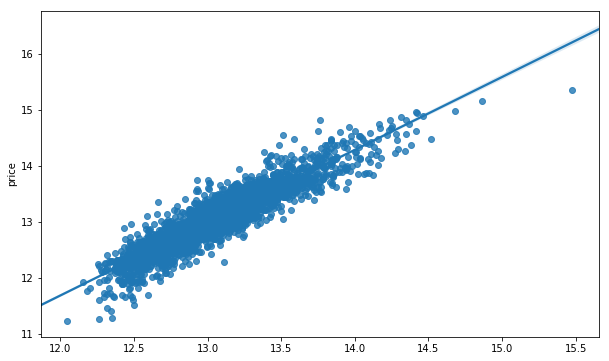

In [63]:
ridgeReg2 = Ridge(alpha=1, normalize=True)
ridgeReg2.fit(X_train_whole,y_train_whole)
predictions_whole = ridgeReg2.predict(X_test_whole)
printStatistics(y_test_whole,predictions_whole)
accuracy = ridgeReg2.score(X_test_whole, y_test_whole)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [64]:
scores = cross_val_score(ridgeReg2, X_whole, y_whole, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.8082974683787143


### 7] Lasso Model with more features
The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

Mean squared error:0.06989703532034212
Root mean squared logarithmic error: 0.2643804745444378
R-squared value: 0.7476623806677796


'Accuracy: 75%'

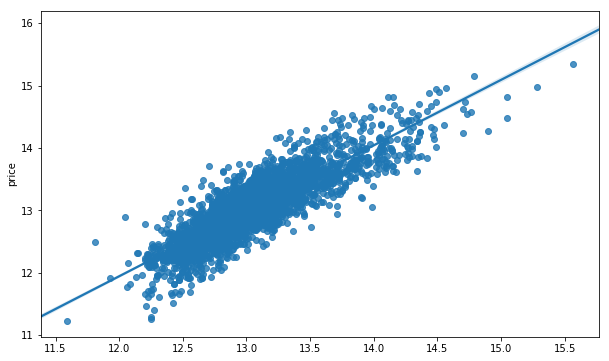

In [65]:
lasso = Lasso(alpha=0.01)
lassoModel=lasso.fit(X_train_whole,y_train_whole)
predictions_whole_lasso = lassoModel.predict(X_test_whole)
printStatistics(y_test_whole,predictions_whole_lasso)
accuracy = lassoModel.score(X_test_whole, y_test_whole)
"Accuracy: {}%".format(int(round(accuracy * 100)))

## Summary of all models

In [66]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "files/summary.png")

## Loading the dataset for which we have to predict the value

In [84]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
submission_test=pd.read_csv('Test_set.csv')

In [85]:
submission_test.shape

(4222, 20)

In [86]:
submission_test['year_sold'] = submission_test['date'].apply(lambda x: int(x[:4]))

In [87]:
submission_test['house_age'] = submission_test[['year_sold']].sub(submission_test['yr_built'], axis=0)

In [88]:
submission_test['is_renovated'] = submission_test['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

Now I will to process the test data same as I did for train data
2] Converting zipcode to categories
3] As I have not used the new columns created for train dataset I will not create them for test dataset
4] Drop the unwanted columns

In [89]:
submission_test.drop(["yr_built", "yr_renovated","date"], axis = 1, inplace = True) 

In [90]:
submission_test = pd.get_dummies(submission_test,columns=['zipcode'])

In [91]:
X_new=submission_test[X_whole_features1]

In [92]:
#X_test_new = poly.fit_transform(X_new)

TypeError: 'Ridge' object is not callable

In [93]:
new_pred_class=ridgeReg2.predict(X_new)

In [94]:
new_pred_class

array([13.56707533, 13.13427486, 12.75653559, ..., 12.94021394,
       12.56232113, 12.56099069])

In [95]:
pd.DataFrame({'ID':submission_test.id,'Price':new_pred_class}).set_index('ID').to_csv('submission1.csv')